In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint
import math as m

C:\Users\Admin\anaconda\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


S - 0<br>
E - 1<br>
ES - 2<br>
Ep - 3 <br>
EpS - 4<br>
EpP - 5<br>
P - 6<br>

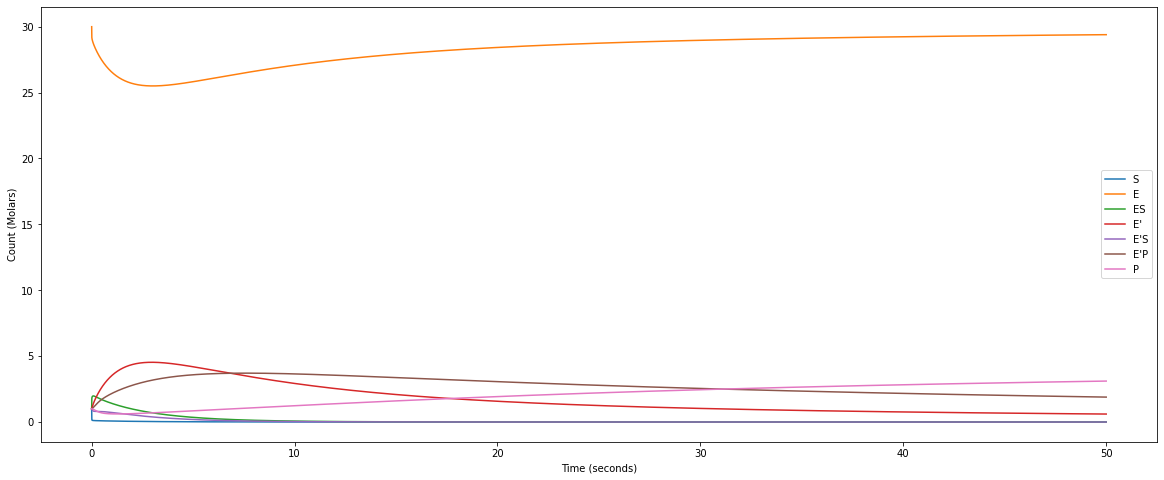

In [153]:
def rxn(Z,t):
    S = Z[0]
    E = Z[1]
    ES = Z[2]
    Ep = Z[3]
    EpS = Z[4]
    EpP = Z[5]
    P = Z[6]
    
    k1 = S*E/ES
    k1n = 1/k1
    
    k2 = ES/EpS
    k2n = 1/k2
    
    k3 = EpS/(Ep*S)
    k3n = 1/k3
    
    k4 = Ep*P/EpP
    k4n = 1/k4
    
    k5 = E/Ep
    k5n = 1/k5
    
    kc = 1#EpS/EpP #1
    
    #S + E = ES  (n stands for opposite direction)
    r1 = k1*S*E
    r1n = k1n*ES
    
    #ES = E'S
    r2 = k2*ES
    r2n = k2n*EpS
    
    #E'S = E' + S
    r3 = k3*EpS
    r3n = k3n*Ep*S
    
    #E' + P = E'P
    r4 = k4*Ep*P
    r4n = k4n*EpP
    
    #E'S - E'P
    rc = kc*EpS
    
    #E = E'
    re = k5*E
    ren = k5n*Ep
        
    dSdt = r1n + r3 - (r1 + r3n)
    dEdt = ren + r1n - (r1)
    dESdt = r1 + r2n - (r1n+r2)
    dEpdt = r3 + r4n - (ren + r3n + r4n)
    dEpSdt = r2 + r3n - (r2n + rc + r3)
    dEpPdt = rc + r4 - r4n
    dPdt = r4n - r4
    
    return[dSdt, dEdt, dESdt, dEpdt, dEpSdt, dEpPdt, dPdt]

t = np.linspace(0,50,25000) #0,200
Z0 = [1,30,1,1,1,1,1] #500,10
Conc = odeint(rxn,Z0,t)

C0 = Conc[:,0]
C1 = Conc[:,1]
C2 = Conc[:,2]
C3 = Conc[:,3]
C4 = Conc[:,4]
C5 = Conc[:,5]
C6 = Conc[:,6]

plt.figure(figsize=(20,8))
plt.plot(t,C0, label="S");
plt.plot(t,C1, label="E");
plt.plot(t,C2, label="ES");
plt.plot(t,C3, label="E'");
plt.plot(t,C4, label="E'S");
plt.plot(t,C5, label="E'P");
plt.plot(t,C6, label="P");
plt.xlabel('Time (seconds)');
plt.ylabel('Count (Molars)');
plt.legend();

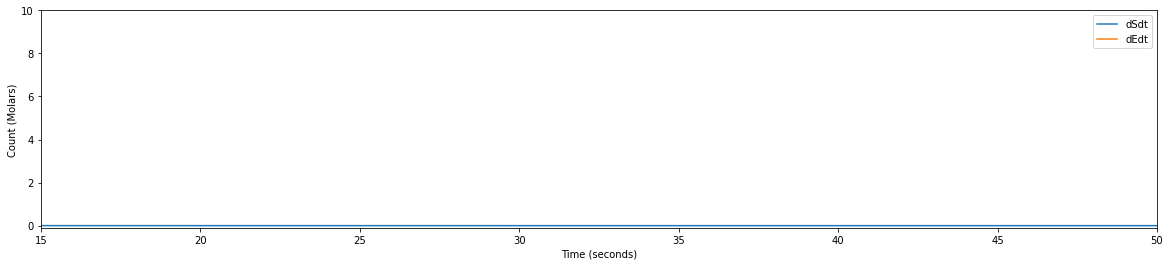

In [154]:
plt.figure(figsize=(20,4))
plt.xlim(15,50)
plt.ylim(-.1,10)
plt.plot(t,C0, label="dSdt");
plt.plot(t,C1, label="dEdt");
plt.xlabel('Time (seconds)');
plt.ylabel('Count (Molars)');
plt.legend();

In [155]:
num = 10000

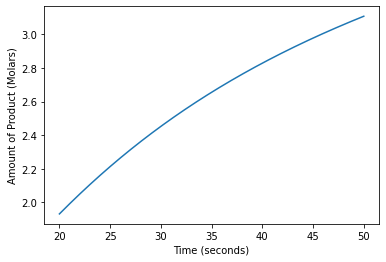

In [156]:
plt.xlabel('Time (seconds)');
plt.ylabel('Amount of Product (Molars)');
plt.plot(t[num:],C6[num:]);

In [157]:
slope = (C6[-1]-C6[num])/(t[-1]-t[num])
slope

0.03922541360759848

In [158]:
y = []
total = 0

for i in range(len(C1)):
    total += C1[i]
    #slope1 = (C6[i+1]-C6[i])/(t[i+1]-t[i])
    y.append(slope/total)

In [159]:
#slope1 = (C6[i+1]-C6[i])/(t[i+1]-t[i])

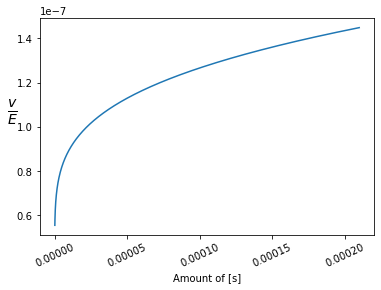

In [160]:
plt.xlabel('Amount of [s]');
plt.ylabel(r"$\frac{v}{E}$", rotation='horizontal', fontsize=20);
plt.xticks(rotation = 25)
plt.plot(C0[num:],y[num:]);#C0[:24999]

# Next Step: maximize nh
## Transformations
## $\frac{v}{E}$ $=$ $\frac{[s]^{nh}}{[s]^{nh} + k_{1}^{nh}}$
## $\frac{E}{v}$ $=$ $\frac{[s]^{nh} + k_{1}^{nh}}{[s]^{nh}}$
## $\frac{E}{v}$ $= 1 +$ $\frac{k_{1}^{nh}}{[s]^{nh}}$
## $log(\frac{E}{v})$ $=$ $log(1)$ $+$ $log(\frac{k_{1}^{nh}}{[s]^{nh}})$
## $log(\frac{E}{v})$ $=$ $log(1)$ $+$ $nh \times log(\frac{k_{1}}{[s]})$

In [161]:
C0

array([1.00000000e+00, 4.37989645e-01, 3.04091936e-01, ...,
       1.22285629e-07, 1.22229838e-07, 1.22174074e-07])

In [162]:
C0_list = C0.tolist()
print(C0_list[:5])

[1.0, 0.43798964549111263, 0.30409193636497217, 0.24012669537599324, 0.20327107199262104]


In [163]:
k1 = C0*C1/C2
C0_inv = [np.log(abs(1/i)) for i in C0_list]
y_inv = [np.log(1)+ 10*np.log(k1[i]/abs(y[i])) for i in range(len(y))]

In [164]:
#C0_inv

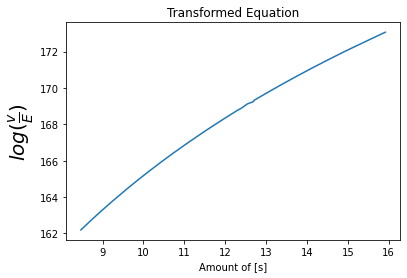

In [165]:
plt.xlabel('Amount of [s]');
plt.ylabel(r"$log(\frac{v}{E})$",  fontsize=20);
plt.title("Transformed Equation")
plt.plot(C0_inv[num:],y_inv[num:]);#[:24999]

# Answer for nh

In [166]:
nh = (y_inv[-1]-y_inv[num])/(C0_inv[-1]-C0_inv[num])
nh

1.4591420708139744